# CLASSIFICATION MODELS

In [1]:
!pip install catboost

     |████████████████████████████████| 65.8MB 44kB/s 


Import the essential libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from tensorflow import keras
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

sb.set()

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,geo_level_1_id,age height_percentage,roof_type_damage_grade_1,outlier_score,other_floor_type_damage_grade_2,other_floor_type_damage_grade_1,has_superstructure_mud_mortar_stone,ground_floor_type_damage_grade_1,geo_level_3_id,geo_level_2_id,foundation_type_damage_grade_1,age area_percentage,age,roof_type_damage_grade_3,roof_type_damage_grade_2,other_floor_type_damage_grade_3,height_percentage^2,height_percentage,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_adobe_mud,ground_floor_type_damage_grade_3,ground_floor_type_damage_grade_2,foundation_type_damage_grade_3,foundation_type_damage_grade_2,count_floors_pre_eq,area_percentage^2,area_percentage height_percentage,area_percentage,age^2,damage_grade
0,0.000094,0.848744,0.963972,-0.964006,0.931444,-0.963986,0.953315,0.953238,-0.957883,0.813999,-0.963900,-0.963985,0.963912,-0.963961,-0.762949,0.964021,-0.964014,0.964001,-0.963962,0.947096,6,150.0,0.343728,0.132853,0.594862,0.360445,1,0.368612,12198,487,0.378479,180.0,30,0.074091,0.58218,0.044693,25.0,5,0,0,1,0.059508,0.571880,0.048906,0.572615,2,36.0,30.0,6,900.0,3
1,0.001110,0.849886,0.964019,-0.964025,0.931884,-0.964022,0.953522,0.953409,-0.957970,0.756340,-0.964010,-0.964022,0.964013,-0.964018,-0.763754,0.964027,-0.964026,0.964025,-0.964019,0.961661,8,70.0,0.343728,0.121162,0.594862,0.360445,1,0.333199,2812,900,0.378479,80.0,10,0.074091,0.58218,0.044693,49.0,7,0,0,0,0.082486,0.584315,0.048906,0.572615,2,64.0,56.0,8,100.0,2
2,0.964017,0.852756,0.964028,-0.964028,0.932369,-0.964028,0.953516,0.953589,-0.958192,0.734684,-0.964028,-0.964028,0.964028,-0.964028,-0.008870,0.964028,-0.964028,0.964028,-0.964028,0.964028,21,50.0,0.343728,0.151625,0.544858,0.376243,1,0.368612,8973,363,0.378479,50.0,10,0.074091,0.58218,0.078899,25.0,5,0,0,0,0.059508,0.571880,0.048906,0.572615,2,25.0,25.0,5,100.0,3
3,0.964025,0.853783,0.964028,-0.964028,0.932555,-0.964028,0.953602,0.953640,-0.958225,0.722533,-0.964028,-0.964028,0.964028,-0.964028,-0.009095,0.964028,-0.964028,0.964028,-0.964028,0.964028,22,50.0,0.343728,0.132858,0.544858,0.376243,1,0.368612,10694,418,0.378479,60.0,10,0.074091,0.58218,0.078899,25.0,5,0,0,0,0.059508,0.571880,0.048906,0.572615,2,36.0,30.0,6,100.0,2
4,0.053939,0.846328,0.964027,-0.964027,0.931248,-0.964027,0.953143,0.953134,-0.957854,0.841531,-0.964027,-0.964027,0.964027,-0.964027,-0.761858,0.964028,-0.964027,0.964027,-0.964027,0.963891,11,270.0,0.343728,0.113076,0.544858,0.376243,0,0.368612,1488,131,0.378479,240.0,30,0.074091,0.58218,0.078899,81.0,9,0,0,1,0.059508,0.571880,0.048906,0.572615,3,64.0,72.0,8,900.0,3


In [5]:
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,geo_level_1_id,age height_percentage,roof_type_damage_grade_1,outlier_score,other_floor_type_damage_grade_2,other_floor_type_damage_grade_1,has_superstructure_mud_mortar_stone,ground_floor_type_damage_grade_1,geo_level_3_id,geo_level_2_id,foundation_type_damage_grade_1,age area_percentage,age,roof_type_damage_grade_3,roof_type_damage_grade_2,other_floor_type_damage_grade_3,height_percentage^2,height_percentage,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_adobe_mud,ground_floor_type_damage_grade_3,ground_floor_type_damage_grade_2,foundation_type_damage_grade_3,foundation_type_damage_grade_2,count_floors_pre_eq,area_percentage^2,area_percentage height_percentage,area_percentage,age^2
0,0.961960,0.852874,0.964028,-0.964028,0.932384,-0.964028,0.953607,0.953581,-0.958146,0.681773,-0.964028,-0.964028,0.964028,-0.964028,-0.010227,0.964028,-0.964028,0.964028,-0.964028,0.964027,17,120.0,0.343728,0.170715,0.594862,0.360445,1,0.368612,11307,596,0.378479,140.0,20,0.074091,0.582180,0.044693,36.0,6,0,0,0,0.059508,0.571880,0.048906,0.572615,3,49.0,42.0,7,400.0
1,0.000094,0.844406,0.963972,-0.964006,0.930788,-0.963986,0.952977,0.952993,-0.957743,0.840984,-0.963900,-0.963985,0.963912,-0.963961,-0.761777,0.964021,-0.964014,0.964001,-0.963962,0.947096,6,125.0,0.343728,0.115369,0.594862,0.360445,1,0.368612,11987,141,0.378479,325.0,25,0.074091,0.582180,0.044693,25.0,5,0,0,0,0.059508,0.571880,0.048906,0.572615,2,169.0,65.0,13,625.0
2,0.957507,0.832885,0.963856,-0.964015,0.931254,-0.963949,0.952889,0.953324,-0.958036,0.793582,-0.964018,-0.963972,0.963910,-0.963949,-0.007912,0.964027,-0.964015,0.963986,-0.963966,0.964011,22,25.0,0.343728,0.162677,0.594862,0.360445,1,0.368612,10044,19,0.378479,20.0,5,0.074091,0.582180,0.044693,25.0,5,0,0,0,0.059508,0.571880,0.048906,0.572615,2,16.0,20.0,4,25.0
3,0.964015,0.837514,0.963995,-0.964027,0.931698,-0.964024,0.953058,0.953458,-0.958145,0.790307,-0.964028,-0.964025,0.964018,-0.964023,-0.008010,0.964028,-0.964027,0.964026,-0.964025,0.964027,26,0.0,0.045047,-0.082784,0.511056,0.265919,0,0.053389,633,39,0.378479,0.0,0,0.472780,0.482173,0.223025,9.0,3,0,1,0,0.419184,0.527427,0.048906,0.572615,1,361.0,57.0,19,0.0
4,0.961960,0.849862,0.964028,-0.964028,0.931870,-0.964028,0.953313,0.953446,-0.958087,0.751381,-0.964028,-0.964028,0.964028,-0.964028,-0.008759,0.964028,-0.964028,0.964028,-0.964028,0.964027,17,105.0,0.383932,0.142335,0.594862,0.360445,1,0.368612,7970,289,0.378479,120.0,15,0.063759,0.552309,0.044693,49.0,7,0,0,0,0.059508,0.571880,0.048906,0.572615,3,64.0,56.0,8,225.0


In [6]:
print("Shape of train: ", train.shape)
print("Shape of test: ", test.shape)

Shape of train:  (260601, 51)
Shape of test:  (86868, 50)


In [7]:
X = train.iloc[:, 0:-1].values
y = train.iloc[:, -1].values

In [8]:
model_scores = {}

Function that trains the model and displays the confusion matrix

In [9]:
def calculate_f1(model, X, y):

  # train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

  # first scale the data
    sc = MinMaxScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    model.fit(X_train, y_train)

  # pedict on data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

  # calculate f1-score
    print("train: ",f1_score(y_train, y_train_pred, average='micro'))
    print("test: ",f1_score(y_test, y_test_pred, average='micro'))

  # plot confusion matrix
    cm_train = confusion_matrix(y_train, y_train_pred)
    cm_test = confusion_matrix(y_test, y_test_pred)

    conf_matrix_train = pd.DataFrame(data=cm_train,columns=['Predicted:1','Predicted:2','Predicted:3'],
                                         index=['Actual:1','Actual:2','Actual:3'])
    conf_matrix_test = pd.DataFrame(data=cm_test,columns=['Predicted:1','Predicted:2','Predicted:3'],
                                         index=['Actual:1','Actual:2','Actual:3'])

    f, axes = plt.subplots(1, 2, figsize=(12, 4))
    sb.heatmap(conf_matrix_train,
              annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0],cmap="YlGnBu").set_title("Train")
    sb.heatmap(conf_matrix_test, 
              annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1],cmap="YlGnBu").set_title("Test")

    return f1_score(y_train, y_train_pred, average='micro'), f1_score(y_test, y_test_pred, average='micro')

## Classification Model
* Decision Tree
* Random Forest
* K-Neirest Neighbours
* XGBoost
* LightGBM
* CatBoost


---

### Decision Tree

In [ ]:
dt = DecisionTreeClassifier(max_depth=10)
f1_train, f1_test = calculate_f1(dt, X, y)
model_scores['dt'] = [f1_train, f1_test]

---
### Random Forest

train:  0.7574827321565617
test:  0.7184244354482838


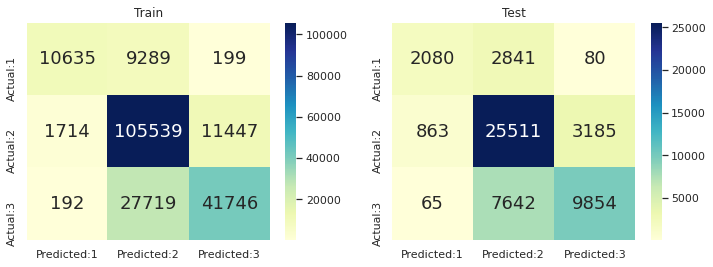

In [11]:
rf = RandomForestClassifier(max_depth = 14)
f1_train, f1_test = calculate_f1(rf, X, y)
model_scores['rf'] = [f1_train, f1_test]

---
### K-NearestNeighbours

train:  0.7006667306216423
test:  0.6819324264691775


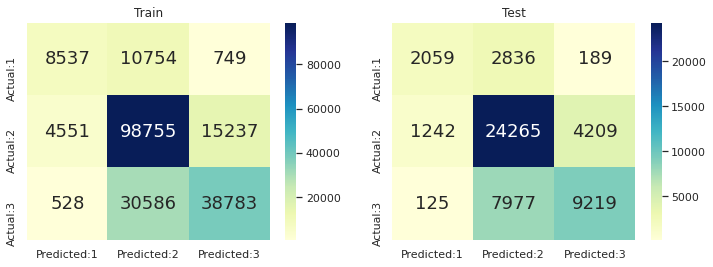

In [12]:
knn = KNeighborsClassifier(n_neighbors=32)
f1_train, f1_test = calculate_f1(knn, X, y)
model_scores['knn'] = [f1_train, f1_test]

---
### XGBoost

train:  0.7326698004604758
test:  0.7169279177298977


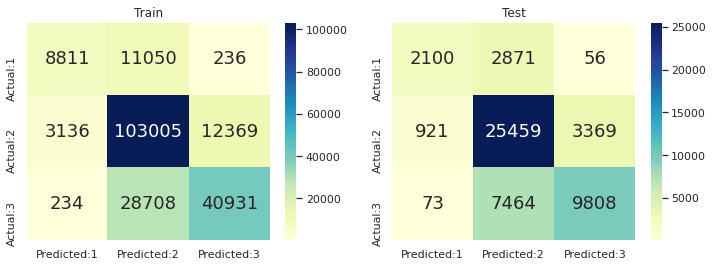

In [13]:
xgb = XGBClassifier(max_depth=7)
f1_train, f1_test = calculate_f1(xgb, X, y)
model_scores['xgb'] = [f1_train, f1_test]

---
### LightGBM

train:  0.7368860322333077
test:  0.7250628345580477


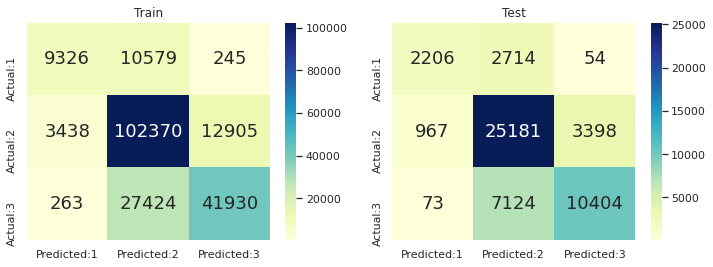

In [14]:
lgb = LGBMClassifier(max_depth=8, learning_rate=0.25)
f1_train, f1_test = calculate_f1(lgb, X, y)
model_scores['lgb'] = [f1_train, f1_test]

---
### CatBoost

train:  0.7409823484267075
test:  0.7302047159494254


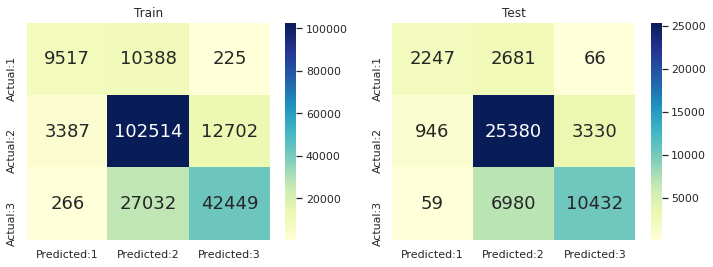

In [15]:
cat = CatBoostClassifier(verbose=False)
f1_train, f1_test = calculate_f1(cat, X, y)
model_scores['cat'] = [f1_train, f1_test]

---
### Plot the model scores

In [16]:
print(model_scores)

{'dt': [0.6978463161933999, 0.6850405786535178], 'rf': [0.7574827321565617, 0.7184244354482838], 'knn': [0.7006667306216423, 0.6819324264691775], 'xgb': [0.7326698004604758, 0.7169279177298977], 'lgb': [0.7368860322333077, 0.7250628345580477], 'cat': [0.7409823484267075, 0.7302047159494254]}


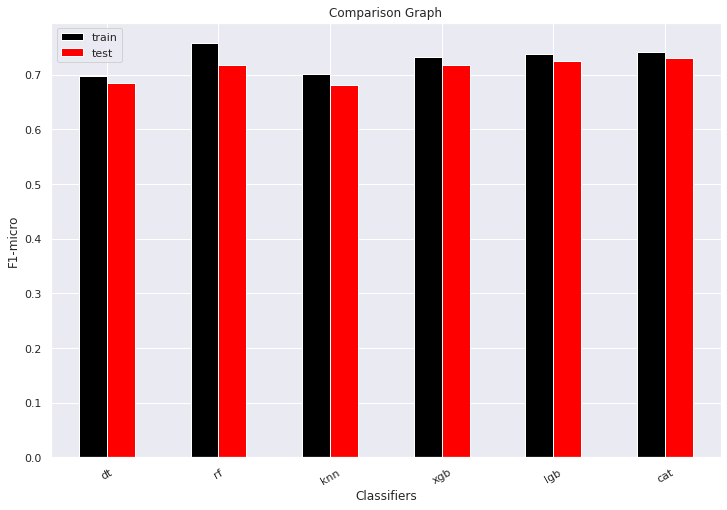

In [18]:
model_scores_df=pd.DataFrame(model_scores).T
model_scores_df.columns = ['train', 'test']
model_scores_df.plot(kind='bar', figsize=(12, 8), color=['black', 'red'], rot=30)                                       
plt.title("Comparison Graph")
plt.xlabel("Classifiers")
plt.ylabel("F1-micro")
plt.show()

### Inference
XGBoost, LightGBM and CatBoost performed the best on the training and test set

The final model will be a stacking classifier with XGBoost, LightGBM and CatBoost as the estimators and Random Forest as the last layer